# **Week 3: Bivariate Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This is the solution notebook for [Week 3](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/solutions/Week_3.ipynb) of MXB107.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [2]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [3]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 😀


## **Workshop Questions**

Let's load in the necessary dataset.

In [4]:
titanic = read.csv("./datasets/titanic.csv", stringsAsFactors = T)
titanic %>%
  str()

titanic %>%
  head(5)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


### **Question 1**

Given the `titanic `dataset, use the techniques and R commands you have learned in this workshop to:
- Create raw, unnormalised, and normalised contingency tables (based on `Class`) to show the association between passenger class (`Class`) and sex (`Sex`).
- Visualise the data using bar plots.

In [5]:
titanic %>%
  group_by(Class, Sex) %>%
  summarise(Count = n(), .groups = "drop") %>%
  pivot_wider(
    names_from = Sex,
    values_from = Count,
    values_fill = 0
  ) %>%
  kable(caption = "Class vs. Sex (Raw Counts)")

titanic %>%
  group_by(Class, Sex) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Freq = Count / sum(Count)) %>%  # total count over whole dataset
  select(Class, Sex, Freq) %>%
  pivot_wider(
    names_from = Sex,
    values_from = Freq,
    values_fill = 0
  ) %>%
  kable(caption = "Class vs. Sex (Unnormalised Frequencies)")

titanic %>%
  group_by(Class, Sex) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = Count / sum(Count)) %>%
  ungroup() %>%
  select(Class, Sex, Freq) %>%
  pivot_wider(
    names_from = Sex,
    values_from = Freq,
    values_fill = 0
  ) %>%
  kable(caption = "Class vs. Sex (Normalised Frequencies by Class)")



Table: Class vs. Sex (Raw Counts)

|Class | Female| Male|
|:-----|------:|----:|
|1st   |    145|  180|
|2nd   |    106|  179|
|3rd   |    196|  510|
|Crew  |     23|  862|



Table: Class vs. Sex (Unnormalised Frequencies)

|Class |    Female|      Male|
|:-----|---------:|---------:|
|1st   | 0.0658791| 0.0817810|
|2nd   | 0.0481599| 0.0813267|
|3rd   | 0.0890504| 0.2317129|
|Crew  | 0.0104498| 0.3916402|



Table: Class vs. Sex (Normalised Frequencies by Class)

|Class |    Female|      Male|
|:-----|---------:|---------:|
|1st   | 0.4461538| 0.5538462|
|2nd   | 0.3719298| 0.6280702|
|3rd   | 0.2776204| 0.7223796|
|Crew  | 0.0259887| 0.9740113|

### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


Let's load the dataset in.

In [6]:
epa_data = read.csv("./datasets/epa_data.csv")
epa_data %>% head()

,city,hwy,cyl,disp,drive,make,model,trans,year
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16,24,8,5.0,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
2,15,22,8,5.0,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
3,16,22,8,5.0,Rear-Wheel Drive,Jaguar,XK Convertible,Automatic,2010
4,19,27,4,2.0,Rear-Wheel Drive,Pontiac,Solstice,Automatic,2010
5,19,29,4,2.0,Rear-Wheel Drive,Pontiac,Solstice,Manual,2010
6,19,24,4,2.4,Rear-Wheel Drive,Pontiac,Solstice,Automatic,2010


### **Question 2**

Compare the distributions of city and highway fuel economy (`city` and `hwy)` for different drivetrain layouts (`drive`).

**Hint**: To do this, you can create boxplots showing the distribution of fuel economy values separately for `city` and `hwy` mpg, faceted by `drive` type.

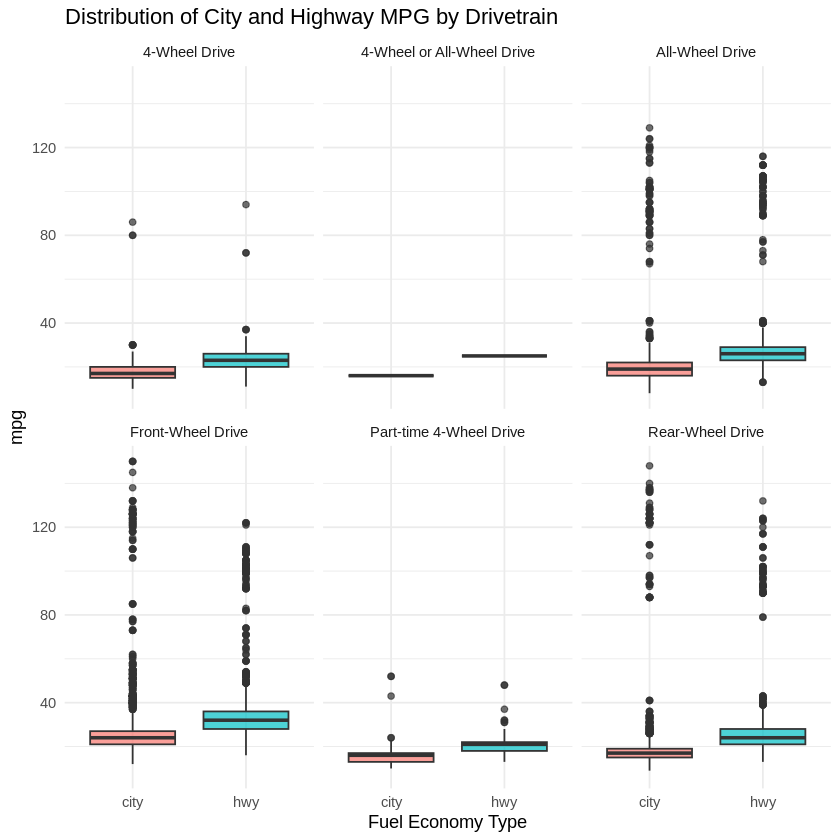

In [7]:
epa_data %>%
  select(city, hwy, drive) %>%
  pivot_longer(cols = c(city, hwy), names_to = "fuelType", values_to = "mpg") -> epa_long

# Plot boxplots of mpg by fuel_type, faceted by drive
ggplot(epa_long, aes(x = fuelType, y = mpg)) +
  geom_boxplot(aes(fill = fuelType), alpha = 0.7) +
  facet_wrap(~ drive) +
  labs(title = "Distribution of City and Highway MPG by Drivetrain",
       x = "Fuel Economy Type",
       y = "mpg") +
  theme_minimal() +
  theme(legend.position = "none")

### **Question 3**

Given the `epa_data` dataset, do the following tasks:

- Calculate the correlation between:
    - `city` and `disp`
    - `hwy` and `disp`  

Use an appropriate method to handle any missing values.
- Create separate scatter plots of `disp` against mileage values for `city` and `hwy`, with points colored by mileage type (`city` or `hwy`).
- Overlay the plots with linear regression lines (with confidence bands).

**Hint**: We need a long-format dataset.

[1] -0.727637

[1] -0.7673995

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 430 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 430 rows containing missing values or values outside the scale range
(`geom_point()`).”


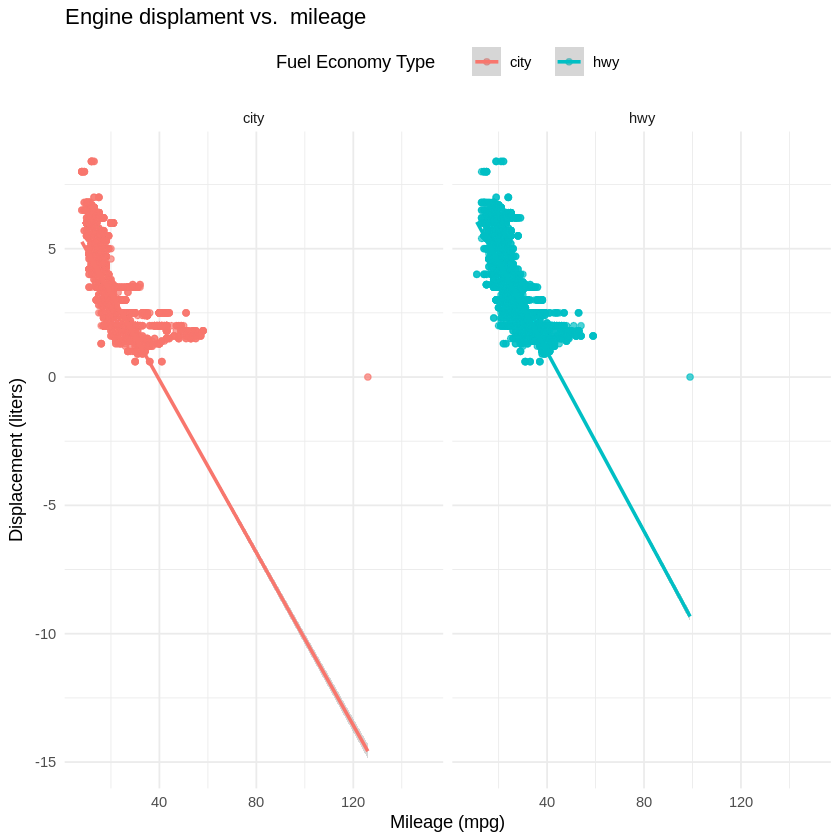

In [8]:
cor(epa_data$city, epa_data$disp, use = "complete.obs")
cor(epa_data$hwy, epa_data$disp, use = "complete.obs")

epa_data %>%
  pivot_longer(
    cols = c(city, hwy),
    names_to = "type",
    values_to = "mpgVal"
  ) -> epa_long

epa_long %>%
  ggplot(aes(x = mpgVal, y = disp, color = type)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = T) +
  facet_wrap(~ type) +
  labs(
    title = "Engine displament vs.  mileage",
    x = "Mileage (mpg)",
    y = "Displacement (liters)",
    color = "Fuel Economy Type"
  ) +
  theme_minimal() +
  theme(legend.position = "top")